In [1]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from cleverhans.attacks import FastGradientMethod, LBFGS, DeepFool, SPSA
from cleverhans.attacks import SaliencyMapMethod, MadryEtAl, CarliniWagnerL2
from cleverhans.utils_keras import KerasModelWrapper

from foolbox.attacks import BoundaryAttack

from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical
from keras import backend as K

import sys
sys.path.append('../Final_notebook/')
import proj_utils as utils

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_test_tmp = np.squeeze(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
model1 = load_model('../Saved_models/good_models/cifar10/cifar10_vgg_like_175.h5')
model2 = load_model('../Saved_models/good_models/cifar10/cifar10_ResNet56v2_model.136.h5')
print(model1.evaluate(x_test, y_test))
print(model2.evaluate(x_test, y_test))

10000/10000 [==============================] - 3s 348us/step
[0.4428189790725708, 0.8906]
10000/10000 [==============================] - 8s 783us/step
[0.39918359007835386, 0.925]


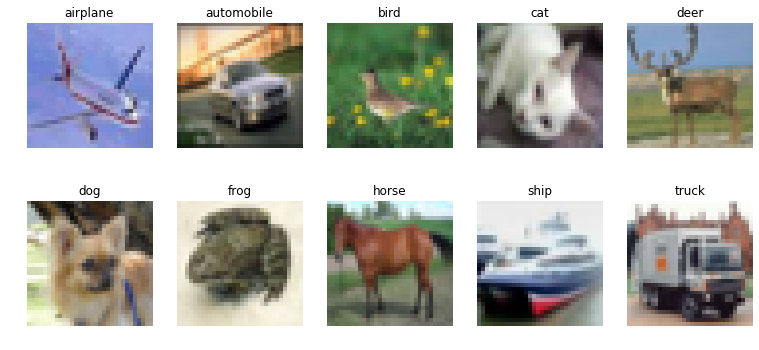

In [4]:
ind = [7733, 4337, 5404, 9336, 5863, 421, 7629, 6534, 1, 11]
sample_images = x_test[ind].copy()
num_classes = 10
f, axs = plt.subplots(2, 5, figsize=(13, 6))
for i, x in enumerate(divmod(i, 5) for i in range(num_classes)):
    axs[x].imshow(sample_images[i])
    axs[x].set_title(utils.CIFAR10_LABEL_NAMES[y_test_tmp[ind[i]]])
    axs[x].axis('off')

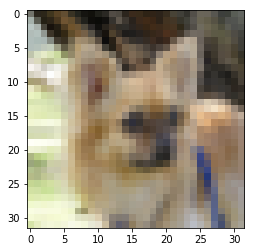

In [5]:
i = 421
img = x_test[[i]]
img_label = y_test[[i]]
plt.imshow(img[0])

In [6]:
utils.decode_cifar10_preds(model1.predict(img), k=5)

[[('dog', 0.99855655),
  ('cat', 0.0011238615),
  ('horse', 0.00014931468),
  ('deer', 0.00010912589),
  ('frog', 4.7063233e-05)]]

In [7]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model1)
sess = K.get_session()

fgsm = FastGradientMethod(ch_model, sess=sess)
deepfool = DeepFool(ch_model, sess=sess)
cwL2 = CarliniWagnerL2(ch_model, sess=sess)
madry = MadryEtAl(ch_model, sess=sess)
saliencymap = SaliencyMapMethod(ch_model, sess=sess)

In [8]:
eps = 3.0/255
fgsm_params = {'eps': eps,
               'clip_min': 0.0,
               'clip_max': 1.0}

madry_params = fgsm_params

advs = []
advs.append(fgsm.generate_np(img, **fgsm_params))
advs.append(deepfool.generate_np(img))
advs.append(cwL2.generate_np(img))
advs.append(madry.generate_np(img, **madry_params))
advs.append(saliencymap.generate_np(img))

advs = np.concatenate(advs)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



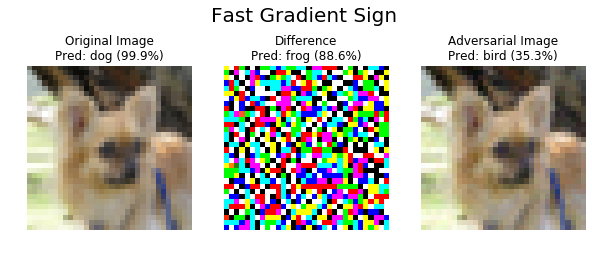

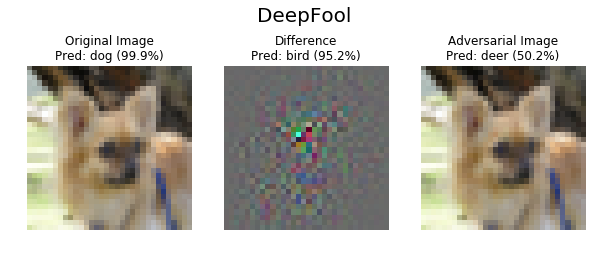

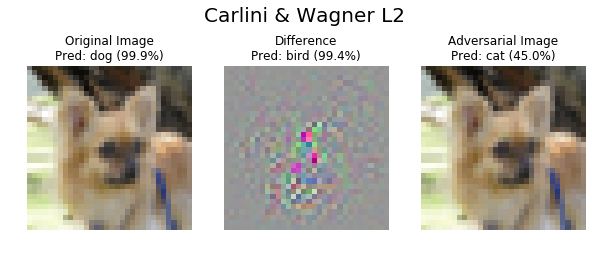

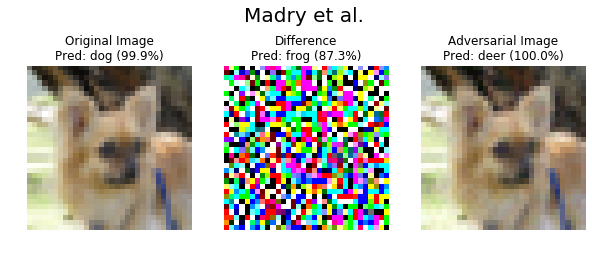

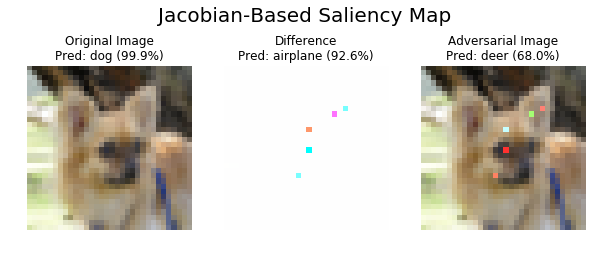

In [9]:
suptitles = ["Fast Gradient Sign", "DeepFool", "Carlini & Wagner L2",
             "Madry et al.", "Jacobian-Based Saliency Map"]
for i in range(len(advs)):
    utils.plot_pair(img[0], advs[i], model1, suptitle=suptitles[i])

In [10]:
print("L0 norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten(), ord=0))

print("\nL1 norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten(), ord=1))

print("\nL2 norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten()))

print("\nLinf norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten(), ord=np.inf))

L0 norm
3070.0
3070.0
3072.0
3072.0
3068.0

L1 norm
36.09803711506082
3.943620774456683
4.100857885795479
31.09639780429356
2.84709874076002

L2 norm
0.6515824853942283
0.1198303400242344
0.12910916289780838
0.5957825784796634
1.2179485591810653

Linf norm
0.011764735567803497
0.025769328369813826
0.025520188200707505
0.011764735567803497
0.792156862745098


In [ ]:
model1 = load_model('../Saved_models/good_models/oid_3class/oid_3class_xception_083.h5')

In [2]:
x_test, y_test = utils.load_oid3class_data()

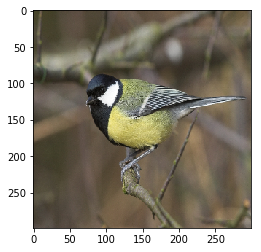

In [4]:
i = 2
img = x_test[[i]]
plt.imshow(img[0])

In [5]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model1)
sess = K.get_session()

fgsm = FastGradientMethod(ch_model, sess=sess)
deepfool = DeepFool(ch_model, sess=sess)
cwL2 = CarliniWagnerL2(ch_model, sess=sess)
madry = MadryEtAl(ch_model, sess=sess)
saliencymap = SaliencyMapMethod(ch_model, sess=sess)

In [ ]:
eps = 3.0/255
fgsm_params = {'eps': eps,
               'clip_min': 0.0,
               'clip_max': 1.0}

madry_params = fgsm_params
deepfool_params = {'nb_candidate': 3}

advs = []
advs.append(fgsm.generate_np(img, **fgsm_params))
advs.append(deepfool.generate_np(img, **deepfool_params))
advs.append(cwL2.generate_np(img))
advs.append(madry.generate_np(img, **madry_params))

advs = np.concatenate(advs)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



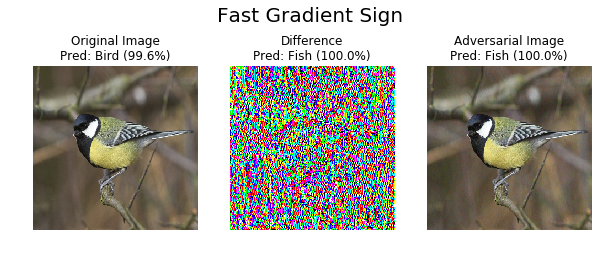

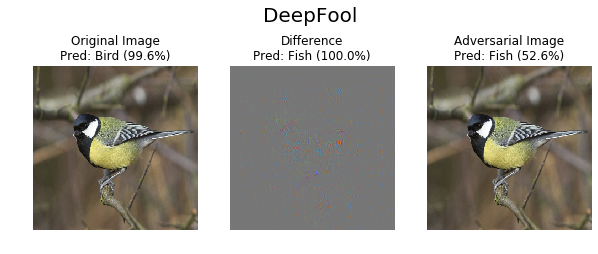

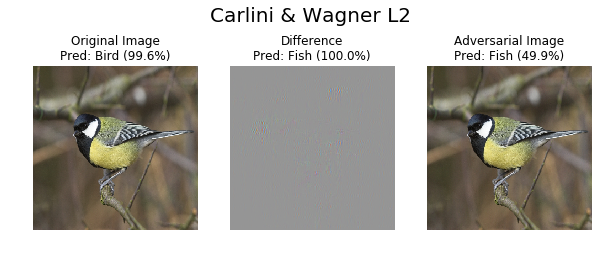

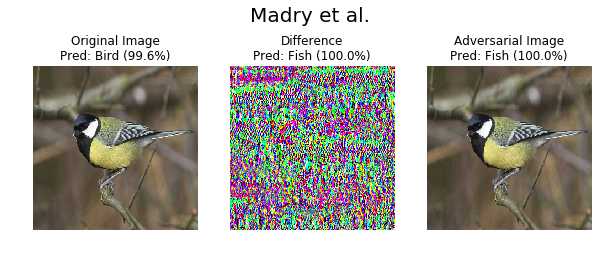

In [ ]:
suptitles = ["Fast Gradient Sign", "DeepFool", "Carlini & Wagner L2",
             "Madry et al."]
for i in range(len(advs)):
    utils.plot_pair(img[0], advs[i], model1, suptitle=suptitles[i])

In [ ]:
print("L2 norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten()))

print("\nLinf norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten(), ord=np.inf))

L2 norm
6.091923
0.28311774
0.1993215
5.0470834

Linf norm
0.011764735
0.016995728
0.0170556
0.011764735


In [2]:
model1 = load_model('../Saved_models/pretrained_models/oid_3class_InceptionResnet_pretrain.h5')

In [ ]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model1)
sess = K.get_session()

fgsm = FastGradientMethod(ch_model, sess=sess)
deepfool = DeepFool(ch_model, sess=sess)
cwL2 = CarliniWagnerL2(ch_model, sess=sess)
madry = MadryEtAl(ch_model, sess=sess)

eps = 3.0/255
fgsm_params = {'eps': eps,
               'clip_min': 0.0,
               'clip_max': 1.0}

madry_params = fgsm_params
deepfool_params = {'nb_candidate': 3}

advs = []
advs.append(fgsm.generate_np(img, **fgsm_params))
advs.append(deepfool.generate_np(img, **deepfool_params))
advs.append(cwL2.generate_np(img))
advs.append(madry.generate_np(img, **madry_params))

advs = np.concatenate(advs)

/home/calvin/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning:

Mean of empty slice.

/home/calvin/python3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
suptitles = ["Fast Gradient Sign", "DeepFool", "Carlini & Wagner L2",
             "Madry et al."]
for i in range(len(advs)):
    utils.plot_pair(img[0], advs[i], model1, suptitle=suptitles[i])

In [ ]:
print("L2 norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten()))

print("\nLinf norm")
for i in range(len(advs)):
    print(np.linalg.norm((advs[i] - img[0]).flatten(), ord=np.inf))